# Simplest Supervised Learning: Simple Linear and Binary Logistic Regression

<img src="https://pbs.twimg.com/media/DnxxShAW0AA8GR5.jpg" width="60%" style="margin-left:auto; margin-right:auto">

## Simple Linear & Logistic Regression Review

You've seen Simple Linear Regression and Binary Logistic Regression in your Stats class.  
But let's take a moment to review both methods

**Simple Linear Regression** - a linear approach to modelling the relationship between a scalar target/response/dependant variable a feature/independant variable  

**Binary Logistic Regression** - model the probability of a categorical target/response/dependant variable for a given feature/independant variable

## Simple Linear Regression

* a useful tool for predicting quatitative responses between a predictor and a single predictor
* answers such questions as:
    - is there a relationship between...
    - how strong is the relationship between....
* described by the equation $$Y \approx \beta_0 + \beta_1X$$

where:  

* $\approx$ can be read as 'is approximately modelled as', or 'regressing Y onto X'
* $\beta_0 \mbox{ & } \beta_1$ are unknown intercept and slope constants (respectively)

## Goal of Simple Linear Regression

We assume there exists a linear relationship between our response and predictor variables. Then....

1. We would like to estimate $\beta_0$ and $\beta_1$, the intercept and slope 
    * once we have our model coefficients, we describe the system with the following equation: $$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1X$$
2. We would like to make certain that our assumptions about linearity are correct
3. We would like to use our model to make predictions for the system

### Let's get started with a Dataset

The following code will import a dataset derived from [Croner & Kaplan's (1994)](https://reader.elsevier.com/reader/sd/pii/0042698994E0066T?token=CCFEF99BAE57CBEB1F03D2F88623103F607C2DA81BEABC6528E8658F21C82931BE9A33EF814DEC7E34BE9CA81D188652&originRegion=us-east-1&originCreation=20211011213722) influencial paper describing the RF sizes and eccentricities of Magnocellular and Parvocellular RGCs in the macaque retina

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/SmilodonCub/DATA621/master/macaqueRGCs.csv'
df = pd.read_csv( url )
df.head()

,Eccentricity,Radius,Class
0,3.525,0.098,M
1,6.234,0.093,M
2,6.531,0.122,M
3,7.718,0.105,M
4,8.386,0.123,M


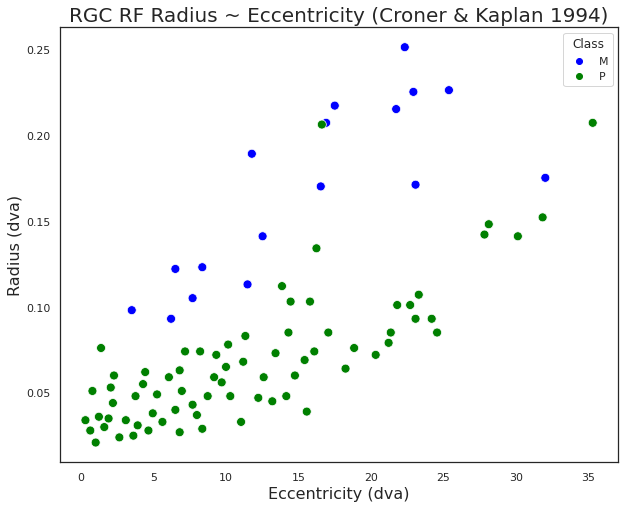

In [2]:
# render a quick plot of some of the data
palette = {'P':'green', 'M':'blue'}
plt.figure(figsize=(10,8))
sns.set_theme(style="white", palette=None)
ax = sns.scatterplot( x = 'Eccentricity', y = 'Radius', hue = 'Class', data = df, s = 80, palette=palette)
ax.set_xlabel( 'Eccentricity (dva)', fontsize= 16 )
ax.set_ylabel( 'Radius (dva)', fontsize= 16 )
ax.set_title( 'RGC RF Radius ~ Eccentricity (Croner & Kaplan 1994)', fontsize= 20)
plt.show()

## 1) Estimating slope and intercept

We would like to estimate parameters that descibe a line of 'best-fit' for each class of RGC  

**best-fit** - the resulting line should be as close as possible to all datapoints for each class  

#### But how to define 'close'...

the most common approach is to find the **Least Squares**, which we will use here. However, there are other methods (e.g. robust regression)

**Goal**: minimize the sum of squares of the differences between the observed dependant/target variable and the predicted linear values model of the independent/predictor variable

### Visualizing Residuals

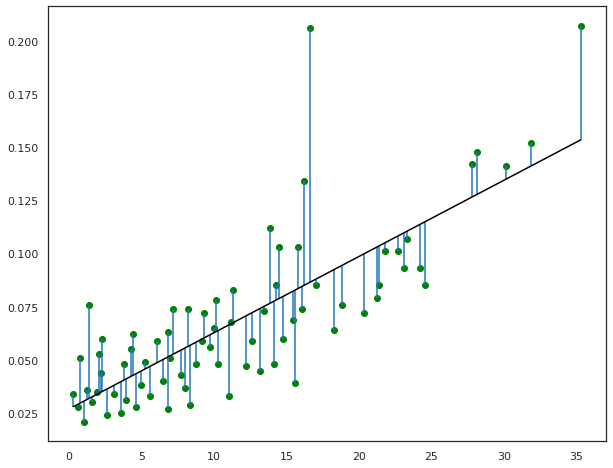

In [3]:
# visualize the residuals for the best fit for P cells
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
dfP = df.loc[df['Class']=='P']
lin_reg.fit( dfP['Eccentricity'].values.reshape(-1, 1), dfP['Radius'].values.reshape(-1, 1))
bfly = lin_reg.predict( dfP['Eccentricity'].values.reshape(-1, 1) )

fig, ax = plt.subplots( figsize = (10,8) )
ax.scatter( x = dfP['Eccentricity'], y = dfP['Radius'], color = 'green')
ax.plot( dfP['Eccentricity'], bfly, 'k' )
ax.vlines( dfP['Eccentricity'], bfly, dfP['Radius'].values.reshape(-1, 1))
plt.show()

### Measures of Minimized Residuals

* **RSS** - Residual Sum of Squares $$\sum_{i=1}^n (y_i - f(x_i ) )^2$$
* **MSE** - Mean Squared Error $$\frac{1}{n}\sum_{i=1}^n (y_i - f(x_i ) )^2$$
* **RMSE** - Root Mean Square Error $$\sqrt{ \frac{1}{n}\sum_{i=1}^n (y_i - f(x_i ) )^2 }$$

### Method 1: Training a Linear Regression Model to Estimate the Coefficients

Closed Loop Approach: We can use a mathematical equation to give us the coefficients

**Normal Equation** : $$\theta = (X^TX)^{-1}X^Ty$$

[if you are not convinced this equation is real](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/)  
[for a longer explanation](https://towardsdatascience.com/normal-equation-in-python-the-closed-form-solution-for-linear-regression-13df33f9ad71)

In [4]:
def find_theta(X, y):   
    m = X.shape[0] # Number of training examples. 
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((m,1)), axis=1)    
    # reshaping y to (m,1)
    y = y.reshape(m,1)    
    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))   
    return theta

In [5]:
X = dfP['Eccentricity'].values.reshape(-1, 1)
y = dfP['Radius'].values.reshape(-1, 1)
theta = find_theta( X,y )
theta

array([[0.00359065],
       [0.02681159]])

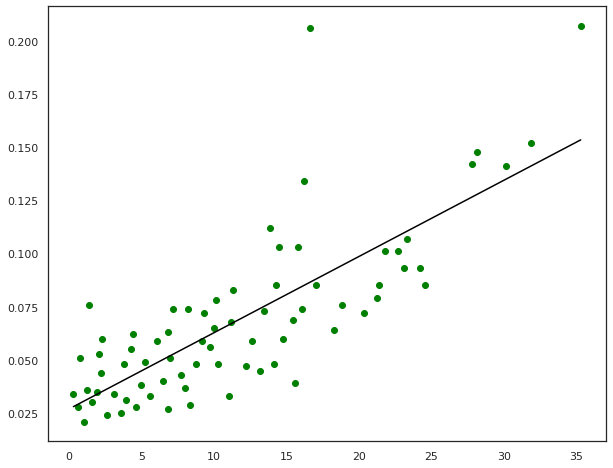

In [6]:
# plot the Normal Equation Solution
X_n = np.append(X, np.ones((X.shape[0],1)), axis=1)
preds = np.dot( X_n,theta )

fig, ax = plt.subplots( figsize = (10,8) )
ax.scatter( x = dfP['Eccentricity'], y = dfP['Radius'], color = 'green')
ax.plot( dfP['Eccentricity'], preds, 'k' )
plt.show()

### Scikit-Learn: The Easy Way Out

Fitting a Linear Regression Model with [Scikit-Learn](https://scikit-learn.org/stable/)   
[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)   

In [7]:
from sklearn.linear_model import LinearRegression

# instantiate a LinearRegression object
lr_mod = LinearRegression()

# fit the model to the data
lr_mod.fit( X,y )

# return the coefficient estimates
lr_mod.intercept_, lr_mod.coef_

(array([0.02681159]), array([[0.00359065]]))

In [8]:
#compare with the previous result
theta

array([[0.00359065],
       [0.02681159]])

## Equivalent Answers

We see that using Scikit-Learn's `LinearRegression()` class returns the same result as the Normal Equation  

The `LinearRegression()` class:  

* implements Singular Value Decomposition (SVD), a different matrix manipulation
    - more efficient than inverting a matrix
    - not all matrices are invertible
* performs OLS to minimize RSS
* has very simple syntax to make predictions on new observations

###  Method 2: Training a Linear Regression Model to Estimate the Coefficients

Inverting a matrix is computationally expensive when your data gets large.  
Here we will use Gradient Descent.  

**Gradient Descent**:  
* a generic optimization algorithm
* we'll use it here to optimize a cost function
* for our simple linear regression example, cost == MSS
* has two parameters:
    - learning rate
    - initial $\theta$ values

In [9]:
np.random.seed(42)
X_b = np.c_[np.ones((X.shape[0], 1)), X]
eta = 0.001  # learning rate
n_iterations = 10
m = X.shape[0]

theta = np.array([[0.03], [0.003]]) # random initialization

for iteration in range(n_iterations):
    # for the gradient, we use the partial derivative of the MSE
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [10]:
theta

array([[0.03000137],
       [0.00340817]])

In [11]:
theta_path_bgd = []
X_new = np.array([[0], [30]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 10
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

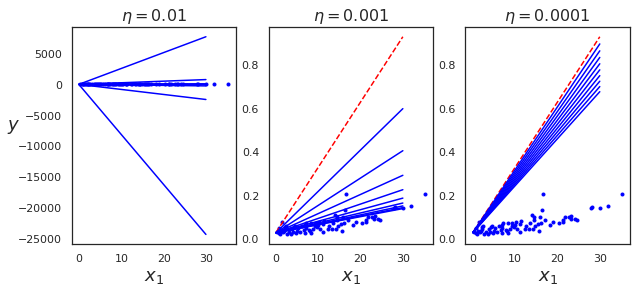

In [12]:
np.random.seed(42)
theta = np.array([[0.03], [0.03]]) 

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.01)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.001, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.0001)


plt.show()

### Gradient Descent with Scikit-Learn

sklearn.linear_model.LinearRegression implements Ordinary Least Squares using a linear algebra procedure called Singular Value Decomposition
[sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor.score)

In [14]:
# Linear Regression implemented with gradient descent
from sklearn.linear_model import SGDRegressor
X = dfP["Eccentricity"].values.reshape(-1, 1)
y = dfP["Radius"].values
# instantiate a LinearRegression object
sgd_mod = SGDRegressor( loss="squared_error", penalty=None )

# fit the model to the data
sgd_mod.fit( X,y )

# return the coefficient estimates
sgd_mod.intercept_ , sgd_mod.coef_

(array([0.01055448]), array([0.00488611]))

## 2) Is the linearity assumption correct?

Before we invest in our model, it is important to do a sanity check to make sure that a linear regression model is appropriate.  

When we chose a Linear Model, we make several assumptions:
1. **Linearity** - the relationship is Linear
2. **Independence** - the is no pattern between residuals
3. **Homoscedasticity** - the residuals have constant variance
4. **Normality** - the residuals have a normal distribution about the prediction result

We will evaluate the model residuals with some typical diagnostic plots

In [15]:
import scipy.stats as stats
import statsmodels.api as sm
from pandas.core.frame import DataFrame

data = [ dfP["Eccentricity"], dfP["Radius"]]
headers = ['x','y']
df_diagnostic = pd.concat(data, axis=1, keys=headers)

In [18]:
def linear_regression(df: DataFrame) -> DataFrame:
    """Perform a univariate regression and store results in a new data frame.

    Args:
        df (DataFrame): orginal data set with x and y.

    Returns:
        DataFrame: another dataframe with raw data and results.
    """
    mod = sm.OLS(endog=df['y'], exog=df['x']).fit()
    influence = mod.get_influence()

    res = df.copy()
    res['resid'] = mod.resid
    res['fittedvalues'] = mod.fittedvalues
    res['resid_std'] = mod.resid_pearson
    res['leverage'] = influence.hat_matrix_diag
    return res


def plot_diagnosis(df: DataFrame):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,8))
    plt.style.use('seaborn')

    # Residual against fitted values.
    df.plot.scatter(
        x='fittedvalues', y='resid', ax=axes[0, 0]
    )
    axes[0, 0].axhline(y=0, color='grey', linestyle='dashed')
    axes[0, 0].set_xlabel('Fitted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Fitted')

    # qqplot
    sm.qqplot(
        df['resid'], dist=stats.t, fit=True, line='45',
        ax=axes[0, 1]#, c='#4C72B0'
    )
    axes[0, 1].set_title('Normal Q-Q')

    # The scale-location plot.
    df.plot.scatter(
        x='fittedvalues', y='resid_std', ax=axes[1, 0]
    )
    axes[1, 0].axhline(y=0, color='grey', linestyle='dashed')
    axes[1, 0].set_xlabel('Fitted values')
    axes[1, 0].set_ylabel('Sqrt(|standardized residuals|)')
    axes[1, 0].set_title('Scale-Location')

    # Standardized residuals vs. leverage
    df.plot.scatter(
        x='leverage', y='resid_std', ax=axes[1, 1]
    )
    axes[1, 1].axhline(y=0, color='grey', linestyle='dashed')
    axes[1, 1].set_xlabel('Leverage')
    axes[1, 1].set_ylabel('Sqrt(|standardized residuals|)')
    axes[1, 1].set_title('Residuals vs Leverage')

    plt.tight_layout()
    plt.show()

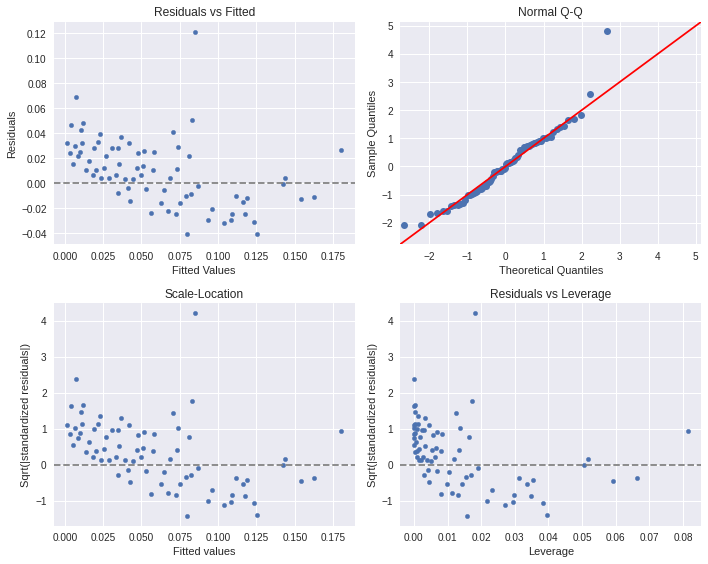

In [19]:
res = linear_regression( df_diagnostic )
plot_diagnosis( res )

### Interpreting Model Diagnostic plots

* Residual vs Fitted - linearity check, also is the variance constant
* Normal Q-Q - are the residual Normal?
* Scale-Location - linearity check, also homoscedasticity
* Residual vs Leverage - detecting Outliers

## Question: are we happy with the diagnostics?

### Remove an Outlier

In [20]:
print( dfP.loc[(df['Radius']>0.2) & (df['Eccentricity'] < 20) ] )
print( dfP.shape )
# drop the suss datapoint
dfP_clean = dfP.drop( index = 73 )
print( dfP_clean.shape )

    Eccentricity  Radius Class
73        16.623   0.206     P
(74, 3)
(73, 3)


In [21]:
# refit the clean data 
lr_clean = LinearRegression()
Xc = dfP_clean['Eccentricity'].values.reshape(-1, 1)
yc = dfP_clean['Radius'].values.reshape(-1, 1)

# fit the model to the data
lr_clean.fit( Xc,yc )

# return the coefficient estimates
lr_clean.intercept_, lr_clean.coef_

(array([0.02651789]), array([[0.00347506]]))

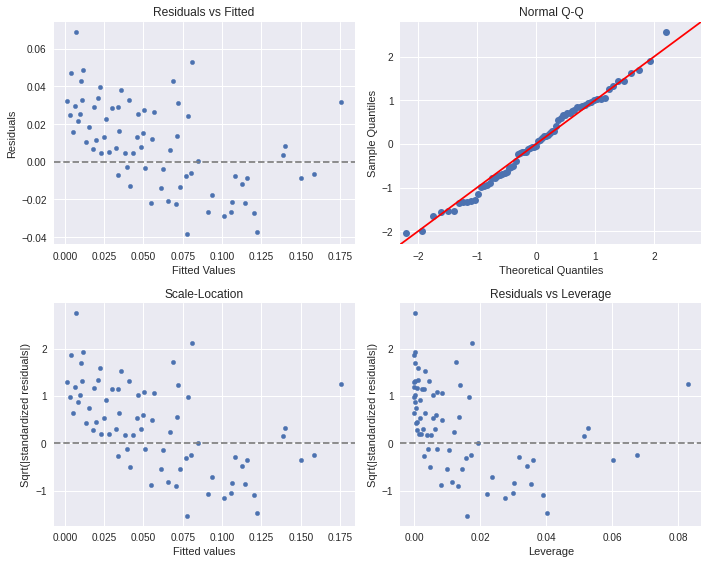

In [22]:
data = [ dfP_clean["Eccentricity"], dfP_clean["Radius"]]
headers = ['x','y']
dfclean_diagnostic = pd.concat(data, axis=1, keys=headers)
res = linear_regression( dfclean_diagnostic )
plot_diagnosis( res )

### Model Summary Tables with `statsmodel`

Scikit-Learn does not do a very good job at revealing the quality of fit for a model.  
Let's use the library `statsmodels` to print a classic regression model report:

In [23]:
import statsmodels.api as sm
mod = sm.OLS(y,X)
#mod = sm.OLS(yc,Xc) #observe the change in R^2 and p-val 
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              481.4
Date:                Tue, 12 Oct 2021   Prob (F-statistic):                    7.27e-34
Time:                        10:37:37   Log-Likelihood:                          158.03
No. Observations:                  74   AIC:                                     -314.1
Df Residuals:                      73   BIC:                                     -311.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0051      0.000     21.940      0.000       0.005       0.006
==============================================================================
Omnibus:                       16.426   Durbin-Watson:                   1.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.034
Skew:                           0.839   Prob(JB):                     2.22e-06
Kurtosis:                       5.372   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## How can we improve this fit?

Let's take a moment....

### 3) Using our model to make predictions

In [ ]:
X_test_pnt = np.array([[28.0]])
y_test_pnt = lr_mod.predict( X_test_pnt )

fig, ax = plt.subplots( figsize = (10,8) )
ax.scatter( x = dfP['Eccentricity'], y = dfP['Radius'], color = 'green')
ax.plot( dfP['Eccentricity'], preds, 'k' )
ax.scatter( x = X_test_pnt, y = y_test_pnt, color = 'red', s = 100)
plt.show()

## Linear Regression Summary

* Simple Linear Regression is not so simple once you dive in.
* There are multiple paths towards an optimal solution; the right path depends on your data
* Before we invest in a model, it is important to verify that the model is appropriate
* The model has used data to inform an estimate of the coefficients. 
    - How can we evaluate the fit of the model?
    - How can we evaluate the performance of the model?

## Binary Logistic Regression

Consider a categorical target variable...  

Goal: can we predict a class label of a target variable given a numeric predictor  
Here we will consider the problem of a binary classification (the target has only two levels)  

Example of Binary Logistic Regression:  

* positive/negative disease diagnosis
* yes/no default loan
* detect/miss whether a stimulus was present

## Why not Linear Regression? 

What if we 1-hot encoded our binary target variable.  
Couldn't we just find the slope to describe the relationship?...

Well, this is problematic for a few of reasons:  

1. The numeric values 0/1 have no real association with the categorical values
2. How would be interpret estimates that lie outside of [0,1]?


## The Logistic Model

To avoid interpretation problems, we will use a function that will only give values in the range [0,1]  
**Logistic Function** a S-shaped curve of the form: $$p(X) = \frac{e^{\beta_0+\beta_1X}}{1 + e^{\beta_0+\beta_1X}}$$

[a conversational derivation of Logistic Regression](https://towardsdatascience.com/logistic-regression-derived-from-intuition-d1211fc09b10)

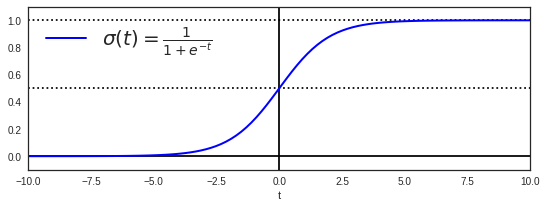

In [24]:
plt.style.use('seaborn-white')
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## Training a Logistic Regression Model

* the Logistic Regression model returns the estimated probability that an observation belongs to the positive class. 
* What is positive?: that is entirely arbitrary
* Cost function: *log loss*  
    - $c(\theta) = \left\{ \begin{array} \\ -log(\hat{p}) & \mbox{if} y=1 \\  -log(1-\hat{p}) & \mbox{if} y=0 
\end{array}\right\}$

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m [y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$$


Unfortunately, there is no convenient closed-form (mathematical) solution, so an optimal solution is found with gradient descent.  

gradient = partial derivative of the log loss function
$$\frac{\partial}{\partial \theta} = \frac{1}{m}\sum_{i-1}^{m}(\sigma(\theta^Tx^{(i)})-y^{(i)})x_j^{(i)}$$

don't worry, we won't try to implement gradient descent from scratch again!

## We need an Example: Challenger O-Ring Dataset

[**The Challenger Disaster**](https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster) - a fatal NASA launch accident that played out on live television and had serious repercussions for the NASA program  
**The Data** - The dataset contains information regarding the state of the solid rocket boosters after launch143 for 23 flights prior the Challenger launch

Task: What is the probability that a O-Ring will fail given the launch temperature?

In [26]:
url = "https://gist.githubusercontent.com/jtrive84/835514a76f7afd552c999e4d9134baa8/raw/6dac51b80f892ef051174a46766eb53c7b609ebd/Challenger.csv"
oRing_df = pd.read_csv( url, index_col = 0 )
#we will only consider Temperature here
oRing_df = oRing_df.drop(['PRESSURE'], axis=1)
oRing_df.head()

,TEMPERATURE,O_RING_FAILURE
FLIGHT,,
1,66,0
2,70,1
3,69,0
4,68,0
5,67,0


In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit( oRing_df['TEMPERATURE'].values.reshape(-1, 1), oRing_df['O_RING_FAILURE'].values)

LogisticRegression()

/home/bonzilla/anaconda3/lib/python3.7/site-packages/matplotlib/patches.py:1390: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


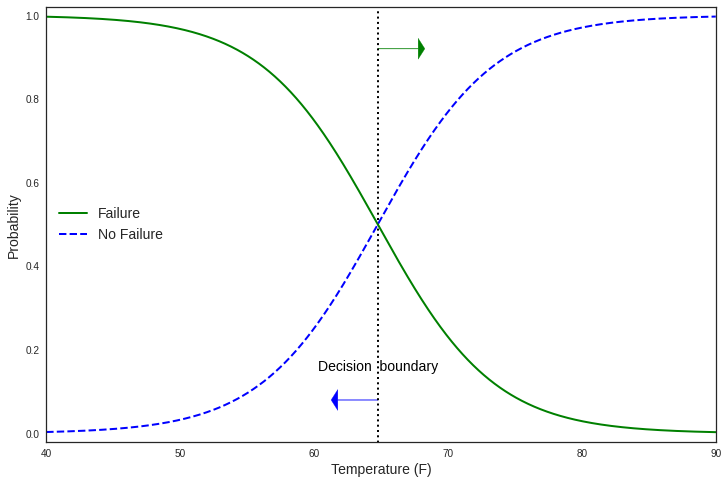

In [58]:
X_new = np.linspace(40, 90, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] <= 0.5][0]

plt.figure(figsize=(12, 8))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Failure")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="No Failure")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -3, 0, head_width=0.05, head_length=0.5, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 3, 0, head_width=0.05, head_length=0.5, fc='g', ec='g')
plt.xlabel("Temperature (F)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([40, 90, -0.02, 1.02])
plt.show()

## We were introduced here to Simple Linear Regression.  Next week we will see that regression can get quite complicated!
<img src="https://content.techgig.com/photo/80071467/pros-and-cons-of-python-programming-language-that-every-learner-must-know.jpg?132269" width="100%" style="margin-left:auto; margin-right:auto">